<h1> Simulator</h1>

In [4]:
import warnings
warnings.simplefilter('ignore')

In [2]:
import os
os.chdir('/home/niklas/Dokumente/Bachelor/Python/PythonScripts/SimulatorSetup/')
from Simulator import *

<h2> Setup a simulation</h2>

<p>Define the number of objects and the dimension of the spectrum matrix.</p>

In [5]:
n_objects=30
spectrumgrid=[4,4]
simulation=Simulator(n_objects,spectrumgrid)

<p>Choose between the Fibonacci and the better ModifiedFibonacci algorithm for source distribution and set boundaries for the spectrum parameters.</p>

In [6]:
simulation.setup(algorithm='Fibonacci',irange=[-1.6,-1],erange=[50,550])

<h2>Convert from Fermi cartesian frame to ICRS angles</h2>

<p>You have to define a position for Fermi by giving a sample trigdat file</p>

In [7]:
trigdat="/home/niklas/Dokumente/Bachelor/rawdata/191017391/glg_trigdat_all_bn191017391_v01.fit"
simulation.generate_j2000(trigdat)

<h2> Get detailed data about your Grid Points</h2>

In [5]:
simulation.grid[11].show()

GBM Cartesian Coordinates: [-0.30318091061932423, -0.2333333333333334, 0.9239247214960713]
RA: 315d30m50.5375s 
DEC: -55d12m10.5985s


,0,1,2,3
0,Index=-1.6 Energy=50.0,Index=-1.6 Energy=216.66,Index=-1.6 Energy=383.33,Index=-1.6 Energy=550.0
1,Index=-1.4 Energy=50.0,Index=-1.4 Energy=216.66,Index=-1.4 Energy=383.33,Index=-1.4 Energy=550.0
2,Index=-1.2 Energy=50.0,Index=-1.2 Energy=216.66,Index=-1.2 Energy=383.33,Index=-1.2 Energy=550.0
3,Index=-1.0 Energy=50.0,Index=-1.0 Energy=216.66,Index=-1.0 Energy=383.33,Index=-1.0 Energy=550.0


<p>You can change your parameter boundaries afterwards while keeping everything else the same</p>

In [6]:
simulation.setup(algorithm='Fibonacci',irange=[-2.,-1.],erange=[300,1000])

In [7]:
simulation.grid[11].show()

GBM Cartesian Coordinates: [0.21373142977507384, -0.6814094774262411, 0.6999999999999998]
RA: 272d51m09.2161s 
DEC: -26d23m33.2985s


,0,1,2,3
0,Index=-2.0 Energy=300.0,Index=-2.0 Energy=533.33,Index=-2.0 Energy=766.66,Index=-2.0 Energy=1000.0
1,Index=-1.667 Energy=300.,Index=-1.667 Energy=533.,Index=-1.667 Energy=766.,Index=-1.667 Energy=1000
2,Index=-1.333 Energy=300.,Index=-1.333 Energy=533.,Index=-1.333 Energy=766.,Index=-1.333 Energy=1000
3,Index=-1.0 Energy=300.0,Index=-1.0 Energy=533.33,Index=-1.0 Energy=766.66,Index=-1.0 Energy=1000.0


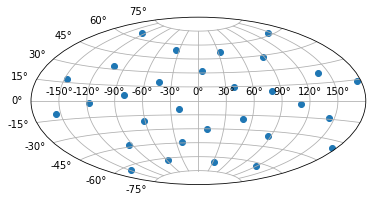

In [7]:
simulation.grid_plot()

<h2>Refining your Grid to get evener distribution</h2>

<p>Simulate physical points on the sphere and using coulomb repulsion to find distribution that maximises distance between all points.</p>

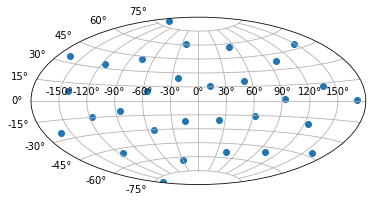

In [8]:
simulation.coulomb_refining(10)
simulation.generate_j2000(trigdat)
simulation.grid_plot()

<p> As you can see we got a significantly better distribution...</p>

In [13]:
simulation.grid[11].show()

GBM Cartesian Coordinates: [ 0.19620562 -0.70983501  0.67648919]
RA: 274d20m21.0933s 
DEC: -24d28m32.8414s


,0,1,2,3
0,Index=-2.0 Energy=300.0,Index=-2.0 Energy=533.33,Index=-2.0 Energy=766.66,Index=-2.0 Energy=1000.0
1,Index=-1.667 Energy=300.,Index=-1.667 Energy=533.,Index=-1.667 Energy=766.,Index=-1.667 Energy=1000
2,Index=-1.333 Energy=300.,Index=-1.333 Energy=533.,Index=-1.333 Energy=766.,Index=-1.333 Energy=1000
3,Index=-1.0 Energy=300.0,Index=-1.0 Energy=533.33,Index=-1.0 Energy=766.66,Index=-1.0 Energy=1000.0


<p>... while keeping the spectrum matrix. So no need to recalculate this again.</p>
<p>If you are not happy with your distribution you can always refine it even more with coulomb_refining and maybe a larger step number</p>

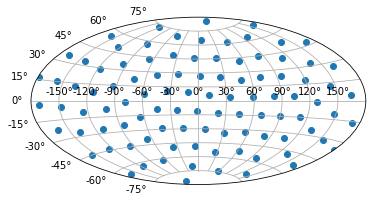

In [14]:
simulation.coulomb_refining(10)
simulation.generate_j2000(trigdat)
simulation.grid_plot()

In [15]:
simulation.grid[11].show()

GBM Cartesian Coordinates: [ 0.20134753 -0.71771848  0.66658784]
RA: 274d07m46.8321s 
DEC: -23d43m00.4346s


,0,1,2,3
0,Index=-2.0 Energy=300.0,Index=-2.0 Energy=533.33,Index=-2.0 Energy=766.66,Index=-2.0 Energy=1000.0
1,Index=-1.667 Energy=300.,Index=-1.667 Energy=533.,Index=-1.667 Energy=766.,Index=-1.667 Energy=1000
2,Index=-1.333 Energy=300.,Index=-1.333 Energy=533.,Index=-1.333 Energy=766.,Index=-1.333 Energy=1000
3,Index=-1.0 Energy=300.0,Index=-1.0 Energy=533.33,Index=-1.0 Energy=766.66,Index=-1.0 Energy=1000.0


In [7]:
simulation.generate_DRM()

In [9]:
simulation.grid[1].response

{'b0': None,
 'b1': None,
 'n0': None,
 'n1': None,
 'n2': None,
 'n3': None,
 'n4': None,
 'n5': None,
 'n6': None,
 'n7': None,
 'n8': None,
 'n9': None,
 'na': None,
 'nb': None}

{'na': <gbm_drm_gen.drmgen_tte.DRMGenTTE object at 0x7f1876802110>, 'nb': <gbm_drm_gen.drmgen_tte.DRMGenTTE object at 0x7f189ceba190>, 'n8': <gbm_drm_gen.drmgen_tte.DRMGenTTE object at 0x7f18a0f76790>, 'n9': <gbm_drm_gen.drmgen_tte.DRMGenTTE object at 0x7f1876853390>, 'b0': <gbm_drm_gen.drmgen_tte.DRMGenTTE object at 0x7f18d9a30a50>, 'b1': <gbm_drm_gen.drmgen_tte.DRMGenTTE object at 0x7f187688bdd0>, 'n0': <gbm_drm_gen.drmgen_tte.DRMGenTTE object at 0x7f18769c7510>, 'n1': <gbm_drm_gen.drmgen_tte.DRMGenTTE object at 0x7f1876aad9d0>, 'n2': <gbm_drm_gen.drmgen_tte.DRMGenTTE object at 0x7f1876938850>, 'n3': <gbm_drm_gen.drmgen_tte.DRMGenTTE object at 0x7f1876beef90>, 'n4': <gbm_drm_gen.drmgen_tte.DRMGenTTE object at 0x7f1876915390>, 'n5': <gbm_drm_gen.drmgen_tte.DRMGenTTE object at 0x7f18768bb190>, 'n6': <gbm_drm_gen.drmgen_tte.DRMGenTTE object at 0x7f18769625d0>, 'n7': <gbm_drm_gen.drmgen_tte.DRMGenTTE object at 0x7f1876a3be50>}
None
(303, 9)
(283, 42)
(275, -10)
(336, 24)
(244, 33)
(307, 

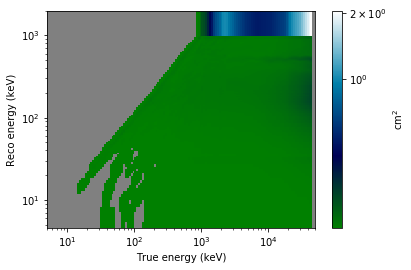

In [9]:
simulation.generate_DRM_spectrum()
print(simulation.grid[5].photon_counts['n0'][1,1])
simulation.grid[5].photon_counts['n0'][1,1].display_rsp()


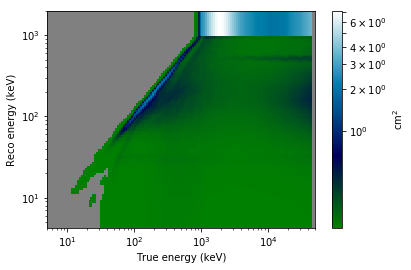

In [12]:
simulation.grid[5].photon_counts['n5'][1,2].display_rsp()